# Titanic Project

## Problem
For this project, I will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). I'm using a "semi-cleaned" version of the original data set and we will try to predict a classification - survival or deceased, based on given features.

## Understanding the Data
The titanic data is from two csv files that have already been split into a train set and a test set. The following are the features in the data set and brief descriptions:
- PassengerId: unique ID
- Survived: boolean
- Pclass: Passenger class 1, 2 or 3
- Name: Passenger name
- Sex: male or female
- Age
- SibSp: # of siblings or spouses aboard
- Parch: # parents or children aboard
- Ticket
- Fare
- Cabin
- Embarked: Port they embarked on

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# to allow the output of plotting commands to be displayed inline
%matplotlib inline
# to allow for faster tab autocomplete usage
%config Completer.use_jedi = False

# set global styling
sns.set_style('whitegrid')
sns.set_palette('YlGnBu_r', 3)

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

### Understanding the Train Data

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows and 12 columns. There is significant missing data in Age and Cabin.

Text(0.5, 1.0, 'Null Data')

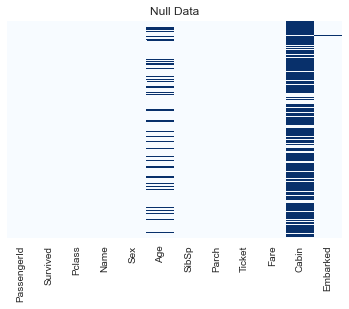

In [4]:
# visualize missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.title('Null Data')

There is also one or two missing Embarked data points.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baxter, Mr. Quigg Edmond",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


There were a majority of male passengers at 577. Ticket numbers are non-unique with a max shared ticket number frequency of 7 which is unusual. Perhaps, there were family tickets available. Cabin numbers are also not unique as many were shared.

### Understanding the Test Data

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are 418 rows of the test dataset. There is a significant amount of missing cabin and age data as well as one missing value for Fare.

In [9]:
train_rows = len(train.index)
test_rows = len(test.index)
total_rows = train_rows + test_rows

print('The train to test split is {:%} to {:%}.'.format(train_rows/total_rows, test_rows/total_rows))

The train to test split is 68.067227% to 31.932773%.


## Exploratory Data Analysis

Text(0.5, 1.0, 'Count of Deceased and Survived')

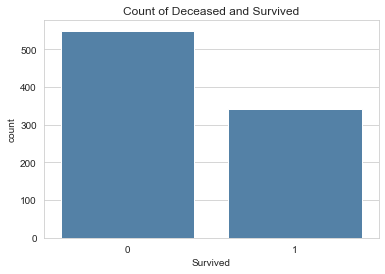

In [10]:
sns.countplot(data=train, x='Survived', color='steelblue')
plt.title('Count of Deceased and Survived')

The majority of passengers did not survive.

Text(0.5, 1.0, 'Count of Deceased and Survived by Gender')

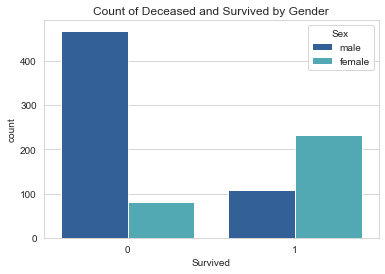

In [11]:
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Count of Deceased and Survived by Gender')

Of the surviving passengers, over 50% were female.    
Of the deceased passengers, approximately approximately 80% were male.    
This is likely due to the fact that women and children were prioritized for the minimal life boats.

Text(0.5, 1.0, 'Count of Deceased and Survived by Passenger Class')

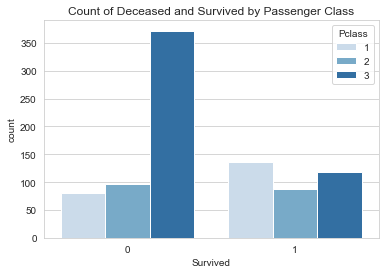

In [12]:
sns.countplot(data=train, x='Survived', hue='Pclass', palette='Blues')
plt.title('Count of Deceased and Survived by Passenger Class')

The majority of the deceased passengers were from the 3rd passenger class.

Text(0.5, 1.0, 'Distribution of Age')

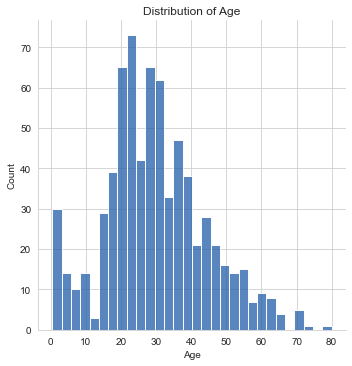

In [13]:
sns.displot(train['Age'].dropna(), bins=30)
plt.title('Distribution of Age')

The majority of passengers fall between the 20-30 age range.

Text(0.5, 1.0, 'Count of Siblings or Spouses')

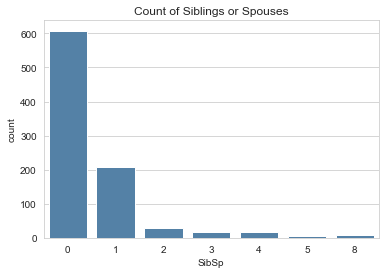

In [14]:
sns.countplot(data=train, x='SibSp', color='steelblue')
plt.title('Count of Siblings or Spouses')

The majority of passengers did not have any siblings or spouses, followed by 1 sibling or spouse (more likely to be a spouse).

Text(0.5, 1.0, 'Distribution of Fares')

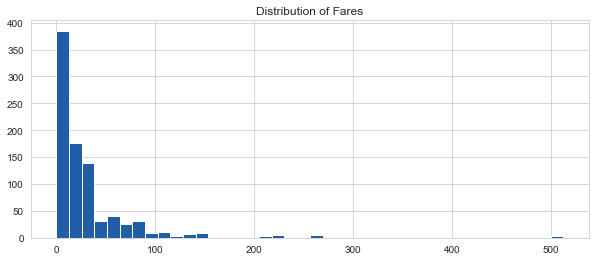

In [15]:
train['Fare'].hist(bins=40, figsize=(10,4))
plt.title('Distribution of Fares')

Text(0.5, 1.0, 'Age by Passenger Class')

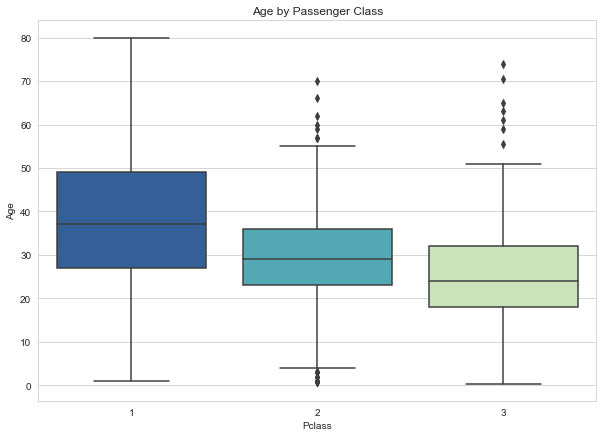

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='Pclass', y='Age')
plt.title('Age by Passenger Class')

The average age by passenger class is higher in first class, then second class.

## Data Cleaning

#### Name:
I will isolate the titles from the names in order to evaluate them.

In [17]:
# split each name by ", " then map the second element which begins with the title
title = train['Name'].str.split(", ").str[1]
# split by "." and map the first element which is not the isolated title
title = title.str.split(".").str[0]
title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Don               1
Mme               1
Capt              1
Sir               1
Lady              1
the Countess      1
Jonkheer          1
Name: Name, dtype: int64

Then, I'll take the four titles with the highest frequency and group the rest to an "Uncommon" category.

In [18]:
# creates a list that includes Mr, Miss, Mrs and Master 
common_titles = title.value_counts().index[0:4]

# takes in name column, isolates the title and labels titles as Uncommon
def replace_uncommon(name):
    name = name.split(", ")[1]
    name = name.split(".")[0]

    if name in common_titles:
        return name
    else:
        return "Uncommon"
    
# apply function to train and test
train['Name'] = train['Name'].apply(replace_uncommon)
test['Name'] = test['Name'].apply(replace_uncommon)

# get dummy variables for Title in train and test
title = pd.get_dummies(train['Name'], drop_first=True)
train = pd.concat([train, title], axis=1)
title = pd.get_dummies(test['Name'], drop_first=True)
test = pd.concat([test, title], axis=1)

#### Age:
There is quite a significant amount of missing age data. Since there seems to be a correlation between passenger class and age, I will replace the missing age values with the mean age of their associated passenger class.

In [19]:
# replace missing ages with the mean age of the passenger's passenger class
def assign_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return train[train['Pclass']==Pclass]['Age'].mean()
    else:
        return Age
    
# apply function to train and test data, start with test otherwise the test mean will change
test['Age'] = test[['Age', 'Pclass']].apply(assign_age, axis=1)
train['Age'] = train[['Age', 'Pclass']].apply(assign_age, axis=1)

#### Sex:

In [20]:
# get dummy variables for Sex in train and test
sex = pd.get_dummies(train['Sex'], drop_first=True)
train = pd.concat([train, sex], axis=1)
sex = pd.get_dummies(test['Sex'], drop_first=True)
test = pd.concat([test, sex], axis=1)

#### Embarked:

In [21]:
# get dummy variables for Embarked in train and test
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, embarked], axis=1)
embarked = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, embarked], axis=1)

#### Fare:
In the test data, there is one missing value for Fare. I will replace this value with the average fare value for the given passenger class.

In [22]:
# replace the missing fare with the mean age of the passenger's passenger class
def assign_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        return train[train['Pclass']==Pclass]['Fare'].mean()
    else:
        return Fare

# apply function to test data
test['Fare'] = test[['Fare', 'Pclass']].apply(assign_fare, axis=1)

#### Feature Selection:
PassengerId will be removed as it is just a unique ID for each passenger, therefore no correlation with Survived.     
Ticket will also be removed as I don't believe there is any correlation with the number and Survived.    
Cabin will be removed as there is too much missing data.
The others will be removed as I have already replaced them with dummy variable columns.

Text(0.5, 1.0, 'Null Data')

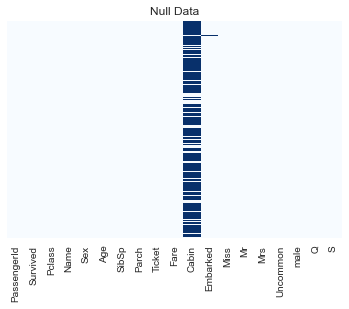

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.title('Null Data')

Since there are only about one or two rows with missing Embarked data, I will drop the Cabin column first so that I can use dropna to drop the rows that have missing Embarked data.

In [24]:
# drop Cabin column from train and test data
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

# drop N/A rows for train and test data
train.dropna(inplace=True)
test.dropna(inplace=True)

In [25]:
train.drop(['PassengerId', 'Name','Sex','Ticket','Name','Embarked'], axis=1, inplace=True)
test.drop(['Name','Sex','Ticket','Name','Embarked'], axis=1, inplace=True)

In [26]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Miss,Mr,Mrs,Uncommon,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,1


## Model Training

In [27]:
# define trainiing and testing sets
X_train = train.drop('Survived', axis=1)
X_test = test.drop('PassengerId', axis=1)
y_train = train['Survived']

# review # of rows and columns
X_train.shape, y_train.shape, X_test.shape

((889, 12), (889,), (418, 12))

In [28]:
# fit training data to Logistic Regression Model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model Testing

In [29]:
# predicting Survived category based on X_test
predictions = logmodel.predict(X_test)

## Model Evaluation
I've evaluated this model based on the train set.

In [30]:
accuracy = round(logmodel.score(X_train, y_train) * 100, 2)
print ('The accuracy of this model is calculated to be',str(accuracy) + '%.')

The accuracy of this model is calculated to be 82.68%.


In [31]:
# Survived predictions based on training set
train_predictions = logmodel.predict(X_train)

In [32]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.79      0.74      0.77       340

    accuracy                           0.83       889
   macro avg       0.82      0.81      0.81       889
weighted avg       0.83      0.83      0.83       889



Text(0.5, 1.0, 'Confusion Matrix')

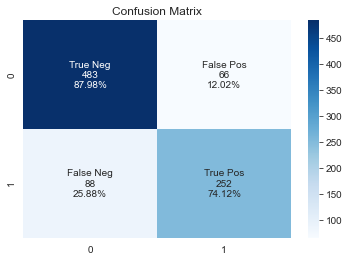

In [33]:
cnf_matrix = confusion_matrix(y_train, train_predictions)

# confusion matrix in percentages
cnf_percent = np.concatenate((cnf_matrix[0]/np.sum(cnf_matrix[0]), cnf_matrix[1]/np.sum(cnf_matrix[1])))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_percent]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')

## Kaggle Submission File

The Kaggle competition submission requires a csv file with exactly 418 entries plus a header row.

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [34]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [35]:
submission.to_csv('titanic_submission.csv', index=False)

## Kaggle Submission Results

Below is the score I received when submitting this to the competition on Kaggle. This model scored at 73% when evaluated on the test data.

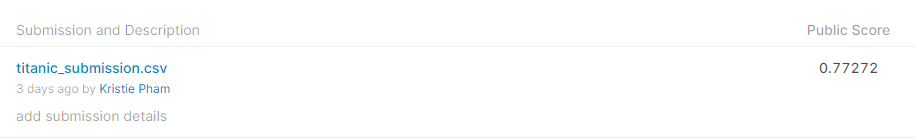